## Linear Regression Assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,Ridge
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [2]:
boston = load_boston()
df1 = pd.DataFrame(boston.data,columns=boston.feature_names)
df2=pd.DataFrame(boston.target,columns=['Target'])

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
df=df1.join(df2)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Target     506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


C:\Users\Raja.Balasubramani\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Raja.Balasubramani\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Raja.Balasubramani\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

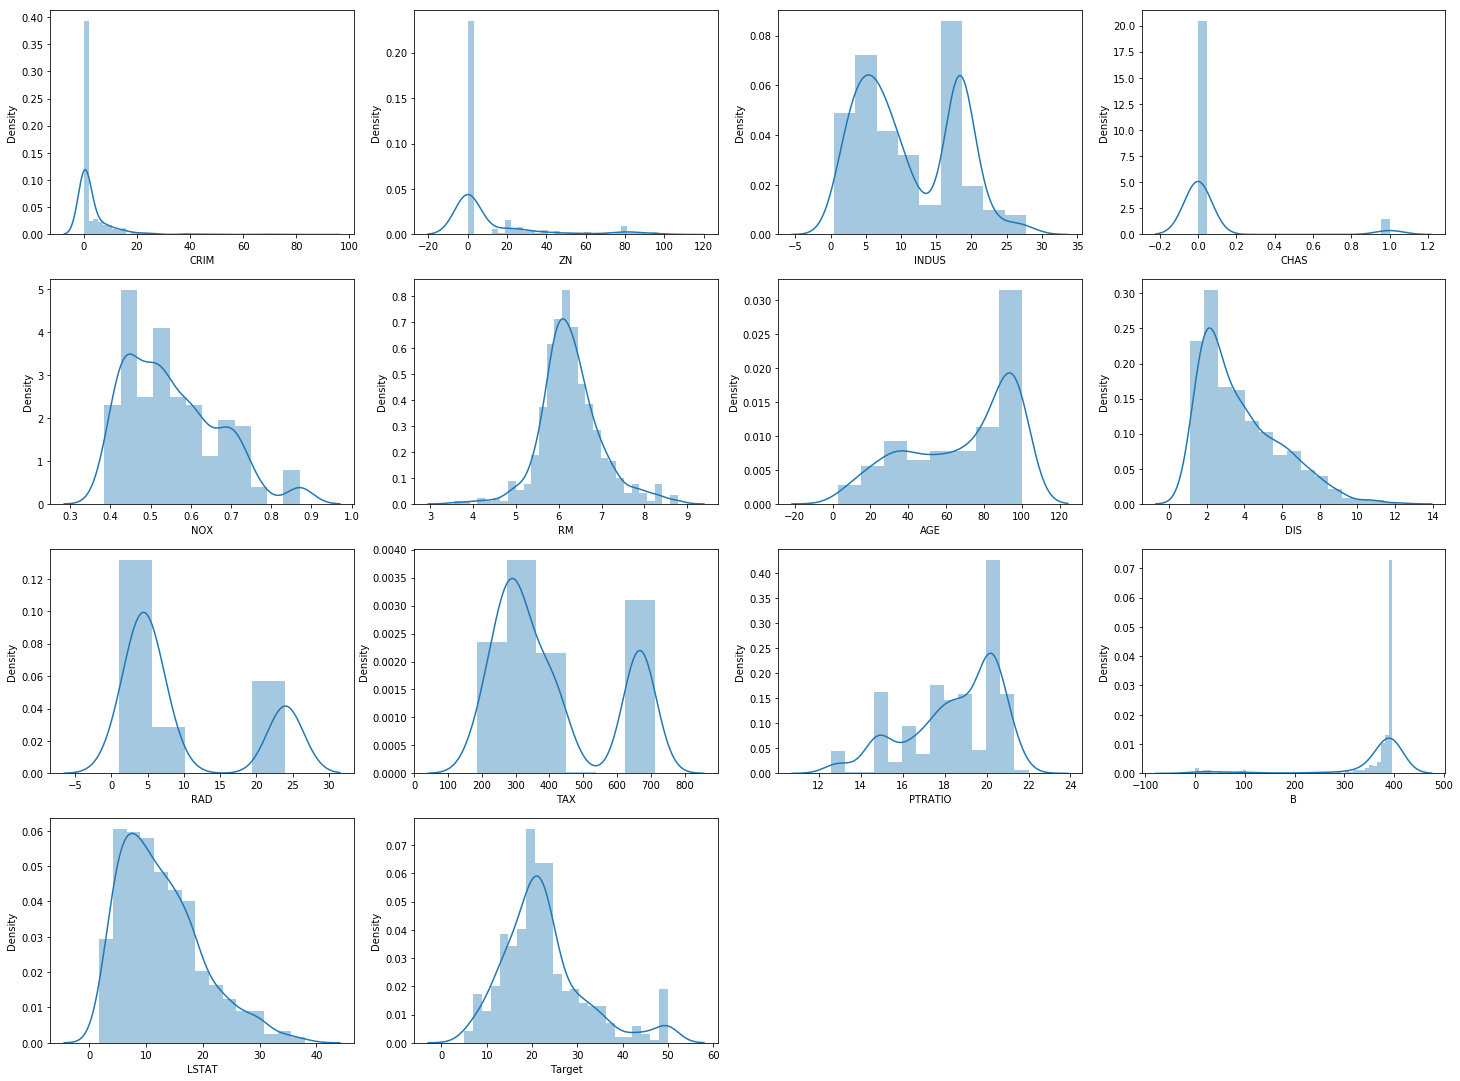

In [7]:
plt.figure(figsize=(25,19))
plotnumber=1
for i in df:
    plt.subplot(4,4,plotnumber)
    sns.distplot(df[i])
    plt.xlabel(i)
    plotnumber+=1

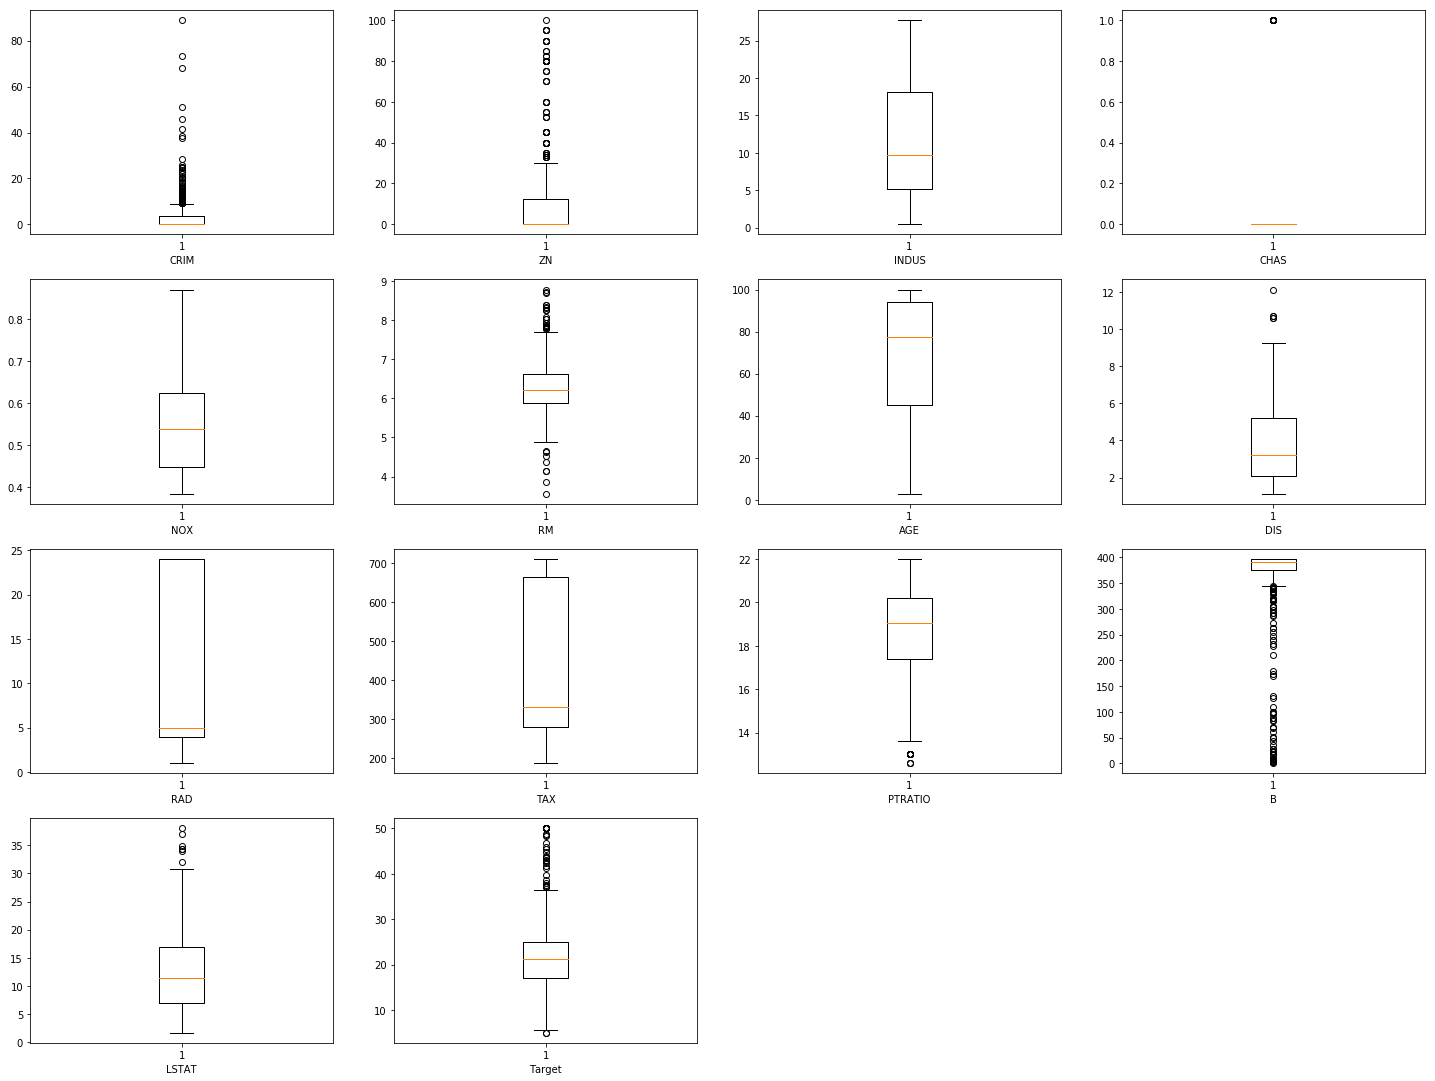

In [8]:
plt.figure(figsize=(25,19))
plotnumber=1
for i in df:
    plt.subplot(4,4,plotnumber)
    plt.boxplot(df[i])
    plt.xlabel(i)
    plotnumber+=1

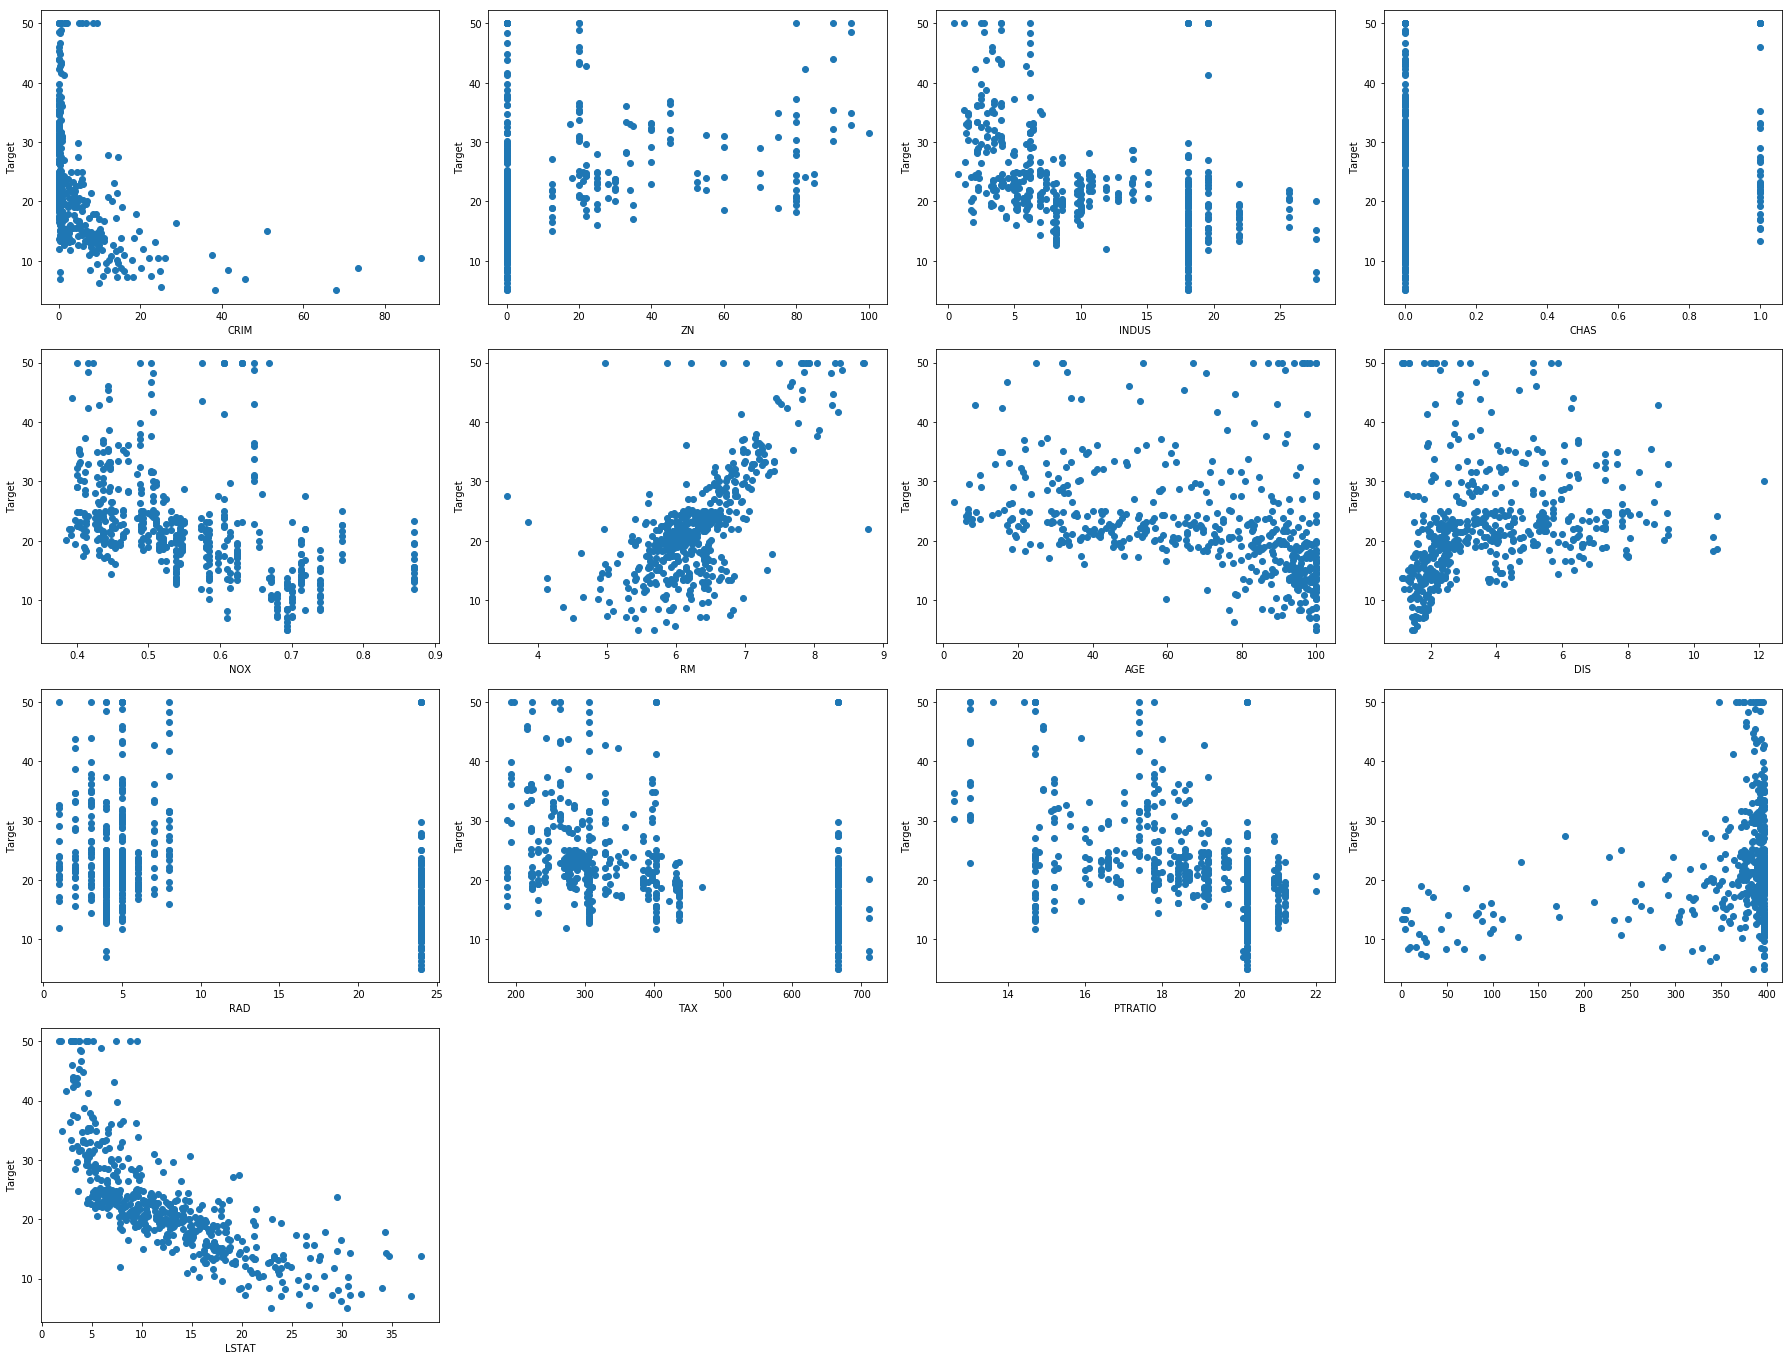

In [9]:
x=df.drop('Target',axis=1)
y=df['Target']
plt.figure(figsize=(25,19))
plotnumber=1
for i in x:
    plt.subplot(4,4,plotnumber)
    plt.scatter(x[i],y)
    plt.xlabel(i)
    plt.ylabel('Target')
    plotnumber+=1
plt.tight_layout()

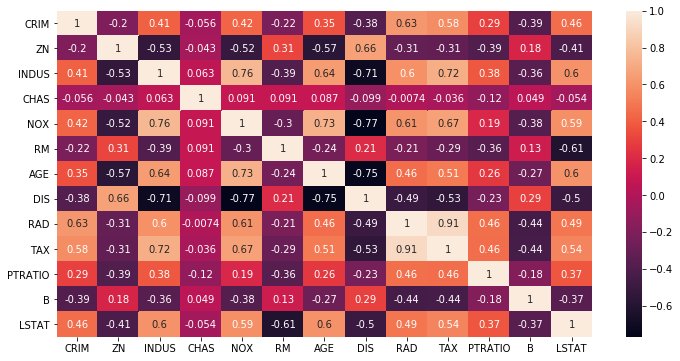

In [10]:
plt.figure(figsize = (12,6))
sns.heatmap(x.corr(),annot = True)

In [11]:
df["NewRADTAX"]=pd.DataFrame(np.concatenate((df['RAD'],df["TAX"])))

In [12]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target,NewRADTAX
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,2.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,2.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,3.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,1.0
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,1.0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,1.0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,1.0


In [13]:
x=df.drop(['RAD','TAX','CHAS'],axis=1)

In [14]:
x=x.drop('Target',axis=1)
y=df['Target']

In [15]:
x

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,NewRADTAX
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,15.3,396.90,4.98,1.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,17.8,396.90,9.14,2.0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,17.8,392.83,4.03,2.0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,18.7,394.63,2.94,3.0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,18.7,396.90,5.33,3.0
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,21.0,391.99,9.67,1.0
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,21.0,396.90,9.08,1.0
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,21.0,396.90,5.64,1.0
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,21.0,393.45,6.48,1.0


In [16]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Target, Length: 506, dtype: float64

In [17]:

scaler =StandardScaler()
X_scaled = scaler.fit_transform(x)

In [18]:
pd.DataFrame((X_scaled))

,0,1,2,3,4,5,6,7,8,9,10
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-1.459000,0.441052,-1.075562,-0.982843
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.303094,0.441052,-0.492439,-0.867883
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.303094,0.396427,-1.208727,-0.867883
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,0.113032,0.416163,-1.361517,-0.752922
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,0.113032,0.441052,-1.026501,-0.752922
...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,0.158124,0.439316,0.018673,-0.625796,1.176466,0.387217,-0.418147,-0.982843
502,-0.415249,-0.487722,0.115738,0.158124,-0.234548,0.288933,-0.716639,1.176466,0.441052,-0.500850,-0.982843
503,-0.413447,-0.487722,0.115738,0.158124,0.984960,0.797449,-0.773684,1.176466,0.441052,-0.983048,-0.982843
504,-0.407764,-0.487722,0.115738,0.158124,0.725672,0.736996,-0.668437,1.176466,0.403225,-0.865302,-0.982843


In [19]:
x_train,x_test,y_train,y_test= train_test_split(X_scaled,y,test_size= 0.25,random_state=10)
linear=LinearRegression()
linear_=linear.fit(x_train,y_train)

In [20]:
linear_.score(x_train,y_train)

0.7492888749987661

In [21]:
linear_.score(x_test,y_test)

0.6576266492655853

In [22]:
print(linear_.coef_)

[-1.09311812  1.13147827 -0.59388076 -1.87342958  2.59102575  0.3302452
 -3.13051405 -1.92916789  1.19353332 -3.86785477  1.04364422]


In [23]:
linear_.predict(scaler.transform([[-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-1.459000,0.441052,-1.075562,-0.982843]]))

array([37.00642714])

In [24]:
linear_.intercept_

22.402351021734518

In [25]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [26]:
alpha = lasscv.alpha_
alpha

0.0003396459596666427

In [27]:
lasso_reg = LassoCV(alpha)
lasso_reg.fit(x_train, y_train)

C:\Users\Raja.Balasubramani\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.0003396459596666427,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [28]:
lasso_reg.score(x_train,y_train)

0.749286701405257

In [29]:
lasso_reg.score(x_test,y_test)

0.6576689192456521

In [30]:
data=x.join(y)

In [31]:
lm=smf.ols(formula='Target~CRIM+ZN+INDUS+NOX+RM+AGE+ DIS+ PTRATIO+ B+ LSTAT+ NewRADTAX',data=data).fit()

C:\Users\Raja.Balasubramani\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [32]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     120.4
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          4.47e-132
Time:                        21:03:46   Log-Likelihood:                -1510.5
No. Observations:                 506   AIC:                             3045.
Df Residuals:                     494   BIC:                             3096.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.8821      5.181      6.733      0.000      24.703      45.061
CRIM          -0.1124      0.034     -3.354      0.001      -0.178      -0.047
ZN             0.0358      0.014      2.617      0.009       0.009       0.063
INDUS         -0.0568      0.056     -1.008      0.314      -0.168       0.054
NOX          -18.3672      3.889     -4.723      0.000     -26.009     -10.726
RM             3.9716      0.425      9.338      0.000       3.136       4.807
AGE            0.0016      0.013      0.120      0.905      -0.025       0.028
DIS           -1.5012      0.204     -7.372      0.000      -1.901      -1.101
PTRATIO       -1.0331      0.133     -7.796      0.000      -1.293      -0.773
B              0.0101      0.003      3.677      0.000       0.005       0.015
LSTAT         -0.5326      0.052    -10.301      0.000      -0.634      -0.431
NewRADTAX      0.1374      0.042      3.295      0.001       0.055       0.219
==============================================================================
Omnibus:                      180.744   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              799.302
Skew:                           1.545   Prob(JB):                    2.71e-174
Kurtosis:                       8.326   Cond. No.                     1.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
import pickle
filename = 'finalized_model.pickle'
pickle.dump(linear_, open(filename, 'wb'))